In [3]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [ ]:
print()

In [3]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier 

In [5]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
model.fit(X_train, Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [6]:
res = model.predict(X_test)
print(res)
print(Y_test)

[2 2 1 ... 0 0 1]
       0
33393  2
17332  2
17056  0
4078   2
13307  2
...   ..
42468  1
20175  0
36462  0
33115  0
869    1

[8819 rows x 1 columns]


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.9241410590769928
              precision    recall  f1-score   support

           0   0.795483  0.787089  0.791264      1611
           1   0.795955  0.804087  0.800000      1664
           2   1.000000  1.000000  1.000000      5544

    accuracy                       0.924141      8819
   macro avg   0.863813  0.863725  0.863755      8819
weighted avg   0.924140  0.924141  0.924133      8819



c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 8820it [3:03:53,  1.25s/it]                            


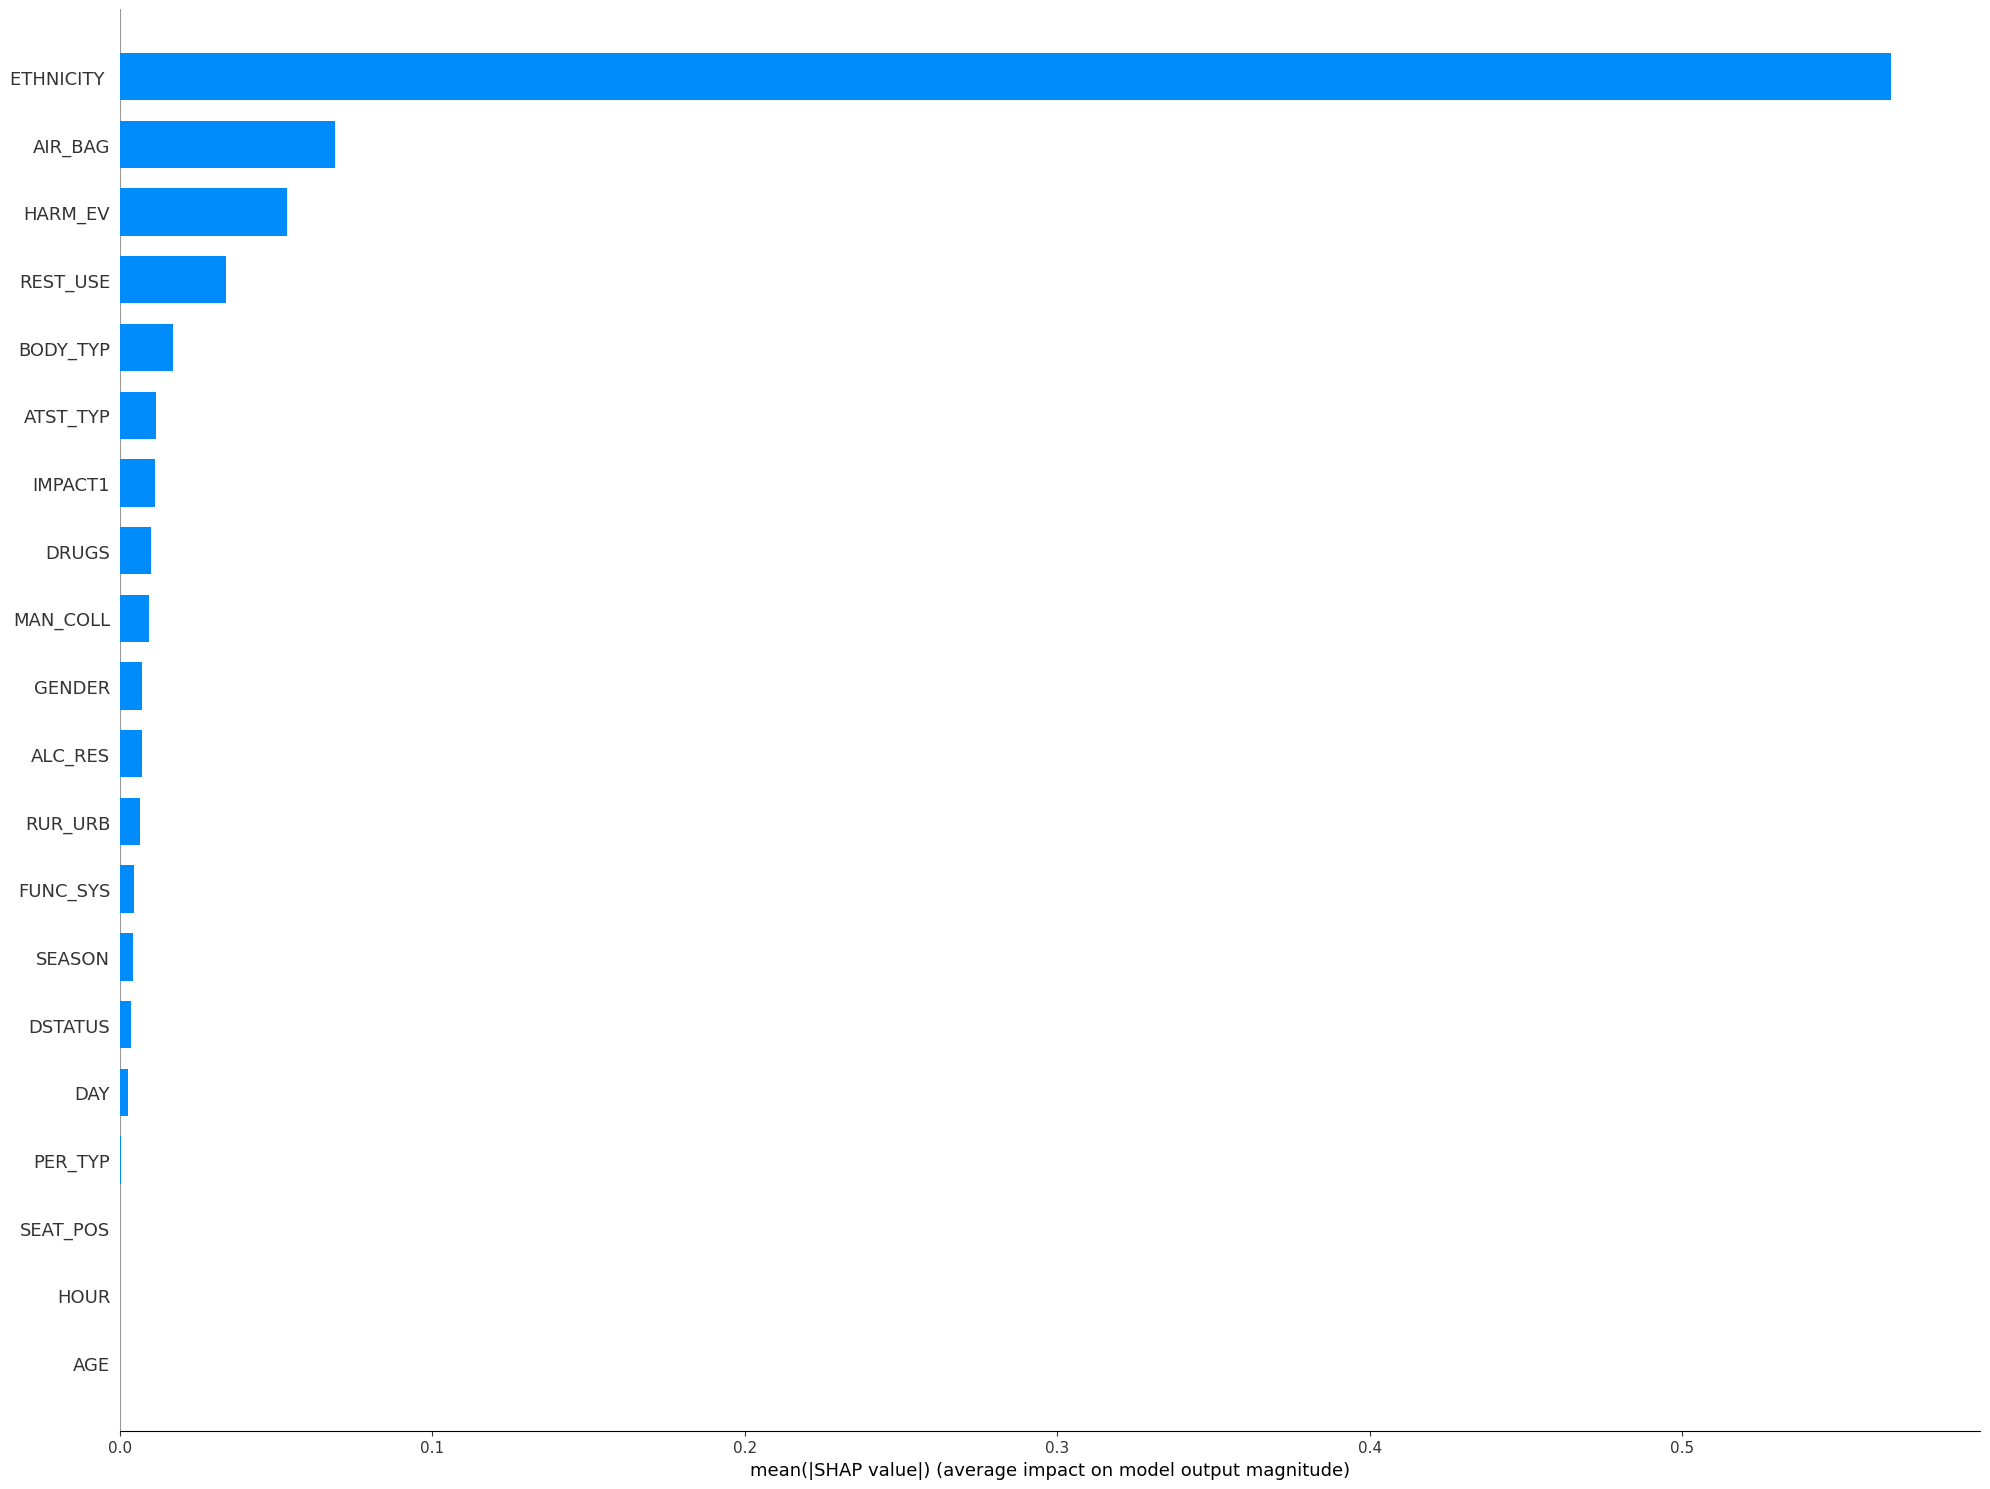

In [8]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

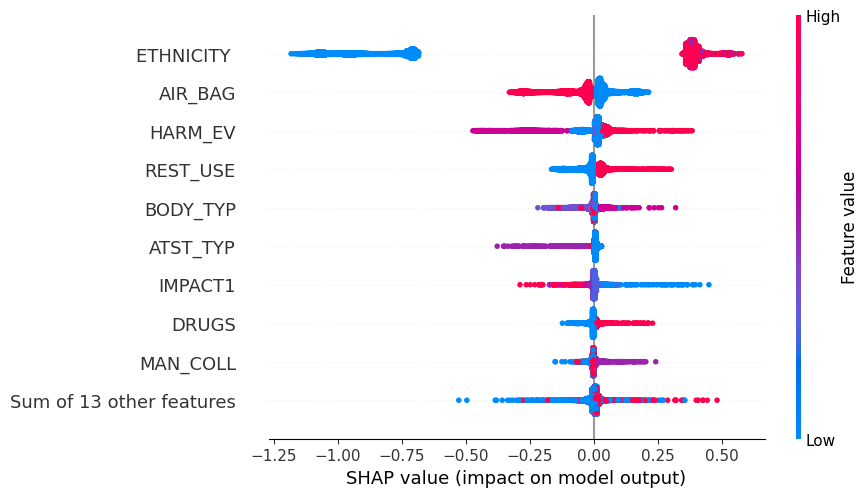

In [9]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

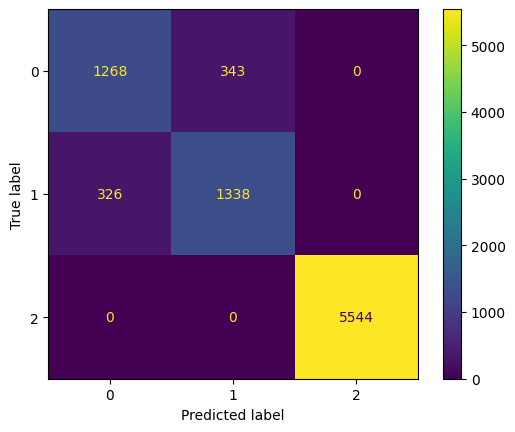

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()